In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [44]:
def derive(func , input_, delta: float = 0.001):
    '''
    Ermittelt die Ableitung einer Funktion "func" für jedes Element im Array "input_".
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

def sigmoid(x):
   return 1 / (1 + np.exp(-x))

def sqared(x):
   return np.power(x,2)        


In [45]:
def multiple_inputs_add_backword(x,y, sigma):
    # Die vorwärtspropagation berechnen
    a = x + y

    dsda = derive(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady


(40,) (40,)


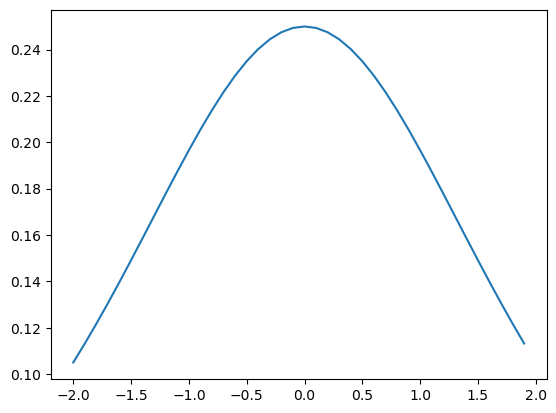

In [46]:
x = np.arange(-2,2,0.1)
y = np.zeros(x.shape)
print(x.shape,y.shape)


y1,y2 = multiple_inputs_add_backword(x,y, sigmoid)
plt.plot(x, y1)



In [47]:
import sympy as sy
sy.init_printing()

In [60]:
x,y = sy.symbols('x y')


In [61]:
f1 = 1 / (1 + sy.exp(-(x)))
f2 = x +y

In [65]:
print("f1'(x) = ", sy.diff(f1,x))
print("f1'(y) = ", sy.diff(f1,y))
print("f2'(x) = ",sy.diff(f2,x))
print("f1'(y) = ",sy.diff(f2,y))

f1'(x) =  exp(-x)/(1 + exp(-x))**2
f1'(y) =  0
f2'(x) =  1
f1'(y) =  1


In [66]:
x, y = sy.symbols('x, y')
F = sy.Matrix([f1, f2])
F

⎡   1   ⎤
⎢───────⎥
⎢     -x⎥
⎢1 + ℯ  ⎥
⎢       ⎥
⎣ x + y ⎦

In [67]:
X_ = (x,y)
F.jacobian(X_)

⎡    -x       ⎤
⎢   ℯ         ⎥
⎢──────────  0⎥
⎢         2   ⎥
⎢⎛     -x⎞    ⎥
⎢⎝1 + ℯ  ⎠    ⎥
⎢             ⎥
⎣    1       1⎦

In [80]:
f = sy.lambdify(X_, F.jacobian(X_))
f(4,4)




array([[0.01766271, 0.        ],
       [1.        , 1.        ]])

In [90]:
x, y = sy.symbols('x, y')
f1 = x**2 + 2*y**3
f2 = x + y
F = sy.Matrix([f1, f2])
F

⎡ 2      3⎤
⎢x  + 2⋅y ⎥
⎢         ⎥
⎣  x + y  ⎦

In [91]:
X_ = (x,y)
F.jacobian(X_)

⎡        2⎤
⎢2⋅x  6⋅y ⎥
⎢         ⎥
⎣ 1    1  ⎦

In [93]:
f = sy.lambdify(X_, F.jacobian(X_))
f(1,1)

array([[2, 6],
       [1, 1]])